# Data understanding and data cleaning

In this section I'll focus on understanding the data and dropping non-relevant columns. The goal is to have a dataset as clean as possible to perform a better analysis later.

## Data collection and data cleaning

Data was collected from public data provided by the Ecuadorian Government.

* Estadísticas de edificaciones: http://catalogo.datosabiertos.gob.ec/dataset/esta


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [ ]:
df_construction_2012 = pd.read_csv('/work/data/bdd-edificaciones-2012.csv', sep=';', encoding='iso8859_15')

In [ ]:
df_construction_2012.head()

,provin,desprovin,canton,descodcantf,mes,desmes,año,desaño,nubo,fper,...,CDISPARC,DESCDISPARC,CDISPRFI,DESCDISPRFI,CDISPRFX,DESCDISPRFX,CNUVICAL,CVAE,CAREAUR,DESCAREAUR
0,9,GUAYAS,6,DAULE,9,SEPTIEMBRE,3,2012,27,2012-09-20,...,6,( >=500 M2),2,Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,57,1125040,1,Urbana
1,14,MORONA SANTIAGO,1,MORONA,6,JUNIO,3,2012,11,2012-06-08,...,1,( < 100 M2 ),1,Recursos Propios Personales,1,Recursos Propios Personales,0,6500,1,Urbana
2,15,NAPO,1,TENA,8,AGOSTO,3,2012,9,2012-08-23,...,1,( < 100 M2 ),5,"Recursos Propios gobierno central, provincial,...",5,"Recursos Propios gobierno central, provincial,...",0,14400,1,Urbana
3,9,GUAYAS,6,DAULE,7,JULIO,3,2012,2,2012-07-03,...,3,( >=200 M2 Y <300 M2),2,Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,0,102628,1,Urbana
4,17,PICHINCHA,1,QUITO,12,DICIEMBRE,3,2012,5,2012-12-17,...,6,( >=500 M2),2,Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,0,600000,2,Rural


In [ ]:
df_construction_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29050 entries, 0 to 29049
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   provin       29050 non-null  int64         
 1   desprovin    29050 non-null  object        
 2   canton       29050 non-null  int64         
 3   descodcantf  29050 non-null  object        
 4   mes          29050 non-null  int64         
 5   desmes       29050 non-null  object        
 6   año          29050 non-null  int64         
 7   desaño       29050 non-null  int64         
 8   nubo         29050 non-null  int64         
 9   fper         29050 non-null  datetime64[ns]
 10  propie       29050 non-null  int64         
 11  despropie    29050 non-null  object        
 12  tipbr        29050 non-null  int64         
 13  destipbr     29050 non-null  object        
 14  sute         29050 non-null  float64       
 15  arpb         29050 non-null  int64         
 16  arco

In [ ]:
df_construction_2012['fper'] = pd.to_datetime(df_construction_2012['fper'])

In [ ]:
df_construction_2012['sute'] = df_construction_2012['sute'].astype('float')    

In [ ]:
df_construction_2012['numuni'] = df_construction_2012['numuni'].astype('float')    


In [ ]:
df_construction_2012.describe()

,provin,canton,mes,año,desaño,nubo,propie,tipbr,sute,arpb,...,CTIPOBR,CPERM,CDISPSUT,CDISPUSO,CDISPARC,CDISPRFI,CDISPRFX,CNUVICAL,CVAE,CAREAUR
count,29050.000000,29050.000000,29050.000000,29050.0,29050.0,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,...,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000
mean,11.151842,4.049845,6.563993,3.0,2012.0,36.323855,1.002616,100.164888,509.181756,129.115835,...,1.154905,1.260482,3.315318,2.108227,2.454320,2.587022,2.003752,3.656661,1.065502e+05,1.073081
std,5.661901,4.778230,3.287877,0.0,0.0,51.482922,0.051083,0.446612,2958.770614,441.987366,...,0.403389,5.291053,2.227219,2.695601,1.477707,3.145351,2.538170,128.895030,1.224566e+06,0.260274
min,1.000000,1.000000,1.000000,3.0,2012.0,1.000000,1.000000,100.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.400000e+01,1.000000
25%,8.000000,1.000000,4.000000,3.0,2012.0,4.000000,1.000000,100.000000,108.000000,42.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.571575e+04,1.000000
50%,10.000000,1.000000,7.000000,3.0,2012.0,15.000000,1.000000,100.000000,200.000000,84.000000,...,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.027550e+04,1.000000
75%,17.000000,6.000000,9.000000,3.0,2012.0,45.000000,1.000000,100.000000,369.000000,126.000000,...,1.000000,1.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,5.967650e+04,1.000000
max,24.000000,28.000000,12.000000,3.0,2012.0,348.000000,2.000000,103.000000,220000.000000,24401.000000,...,3.000000,460.000000,8.000000,14.000000,6.000000,11.000000,11.000000,15561.000000,9.832500e+07,2.000000


In [ ]:
sns.set_theme()

<AxesSubplot:xlabel='count', ylabel='destipbr'>

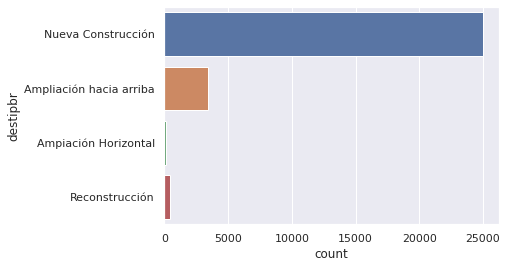

In [ ]:
sns.countplot(y='destipbr', data=df_construction_2012)

<AxesSubplot:xlabel='count', ylabel='desprovin'>

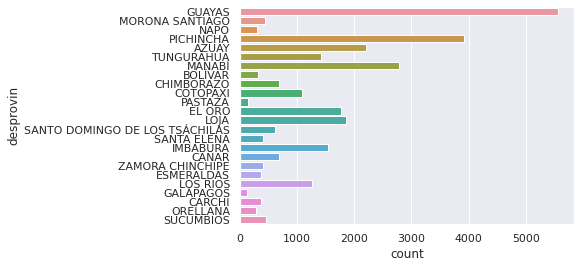

In [ ]:
sns.countplot(y='desprovin', data=df_construction_2012)

In [ ]:
df_most_provinces = df_construction_2012.groupby(['desprovin'])[['provin']].count().sort_values(by='provin', ascending=False)
df_most_provinces

,provin
desprovin,
GUAYAS,5565
PICHINCHA,3912
MANABÍ,2780
AZUAY,2214
LOJA,1858
EL ORO,1763
IMBABURA,1545
TUNGURAHUA,1427
LOS RIOS,1262


<AxesSubplot:xlabel='despropie', ylabel='count'>

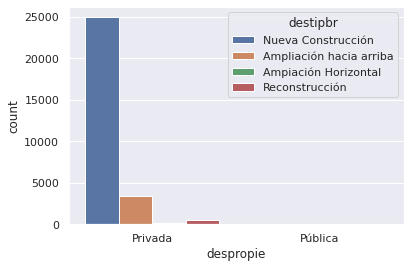

In [ ]:
sns.countplot(x='despropie', hue='destipbr', data=df_construction_2012)

<AxesSubplot:xlabel='despropie', ylabel='count'>

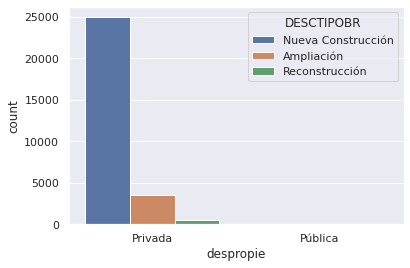

In [ ]:
sns.countplot(x='despropie', hue='DESCTIPOBR', data=df_construction_2012)

<AxesSubplot:>

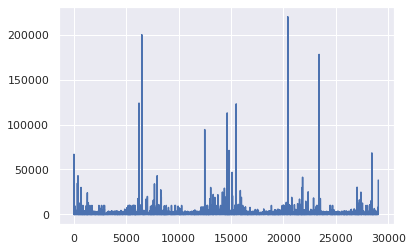

In [ ]:
df_construction_2012['sute'].plot()

In [ ]:
df_construction_2012['sute'].max()

220000

In [ ]:
df_construction_2012.shape

(29050, 96)

(0.0, 1500.0)

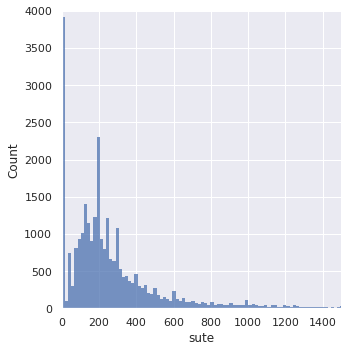

In [ ]:
sns.displot(df_construction_2012, x='sute')
plt.ylim(0, 4000)
plt.xlim(0, 1500)

(0.0, 1500.0)

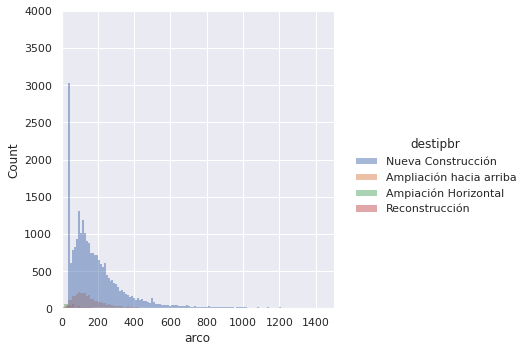

In [ ]:
sns.displot(df_construction_2012, x='arco', hue='destipbr')
plt.ylim(0, 4000)
plt.xlim(0, 1500)

In [ ]:
df_construction_2012.groupby(['despropie'])[['destipbr']].count()

,destipbr
despropie,
Privada,28974
Pública,76


<AxesSubplot:xlabel='count', ylabel='desestru'>

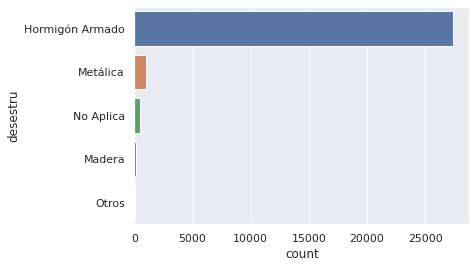

In [ ]:
sns.countplot(y='desestru', data=df_construction_2012)

In [ ]:
df_construction_2012.groupby(['desestru'])[['destipbr']].count()

,destipbr
desestru,
Hormigón Armado,27418
Madera,109
Metálica,1027
No Aplica,468
Otros,28


<AxesSubplot:xlabel='count', ylabel='descimi'>

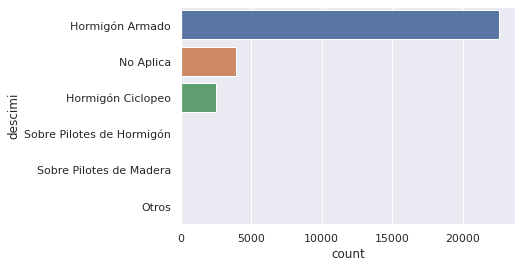

In [ ]:
sns.countplot(y='descimi', data=df_construction_2012)

<AxesSubplot:xlabel='count', ylabel='descubi'>

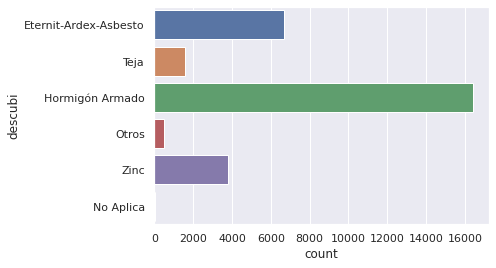

In [ ]:
sns.countplot(y='descubi', data=df_construction_2012)

<AxesSubplot:xlabel='count', ylabel='descres'>

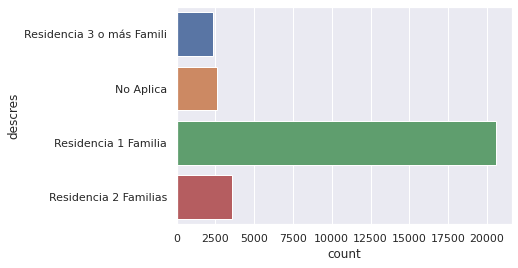

In [ ]:
sns.countplot(y='descres', data=df_construction_2012)

In [ ]:
df_construction_2012['nucu'].max()

915

(0.0, 10.0)

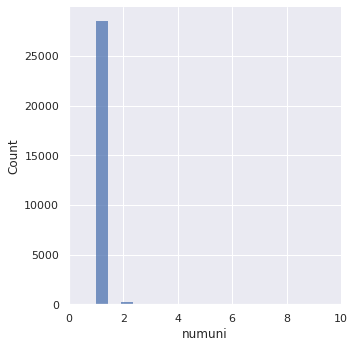

In [ ]:
#numuni: number of units of construction
sns.displot(x='numuni', data=df_construction_2012, bins=1000)
#Too many outliers
plt.xlim(0, 10)

In [ ]:
df_construction_2012['numuni'].median()

1.0

(0.0, 100.0)

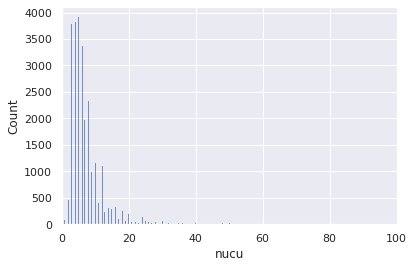

In [ ]:
#nucu: number of rooms
sns.histplot(x='nucu', data=df_construction_2012)
#Too many outliers
plt.xlim(0, 100)

In [ ]:
df_construction_2012['nucu'].median()

5.0

(0.0, 30.0)

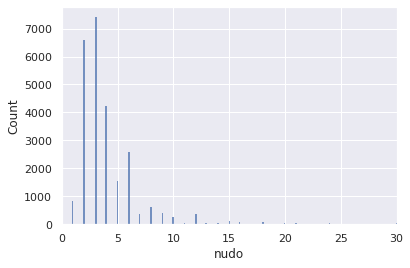

In [ ]:
#nudo: number of living rooms
sns.histplot(x='nudo', data=df_construction_2012)
#Too many outliers
plt.xlim(0, 30)

In [ ]:
df_construction_2012['nudo'].median()

3.0

<AxesSubplot:xlabel='nupi', ylabel='Count'>

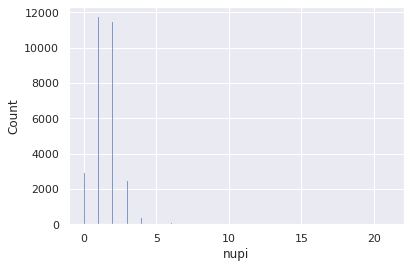

In [ ]:
#nupi: number floors
sns.histplot(x='nupi', data=df_construction_2012)

In [ ]:
df_construction_2012['nupi'].describe()

count    29050.000000
mean         1.541583
std          0.995018
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: nupi, dtype: float64

<AxesSubplot:xlabel='tonp', ylabel='Count'>

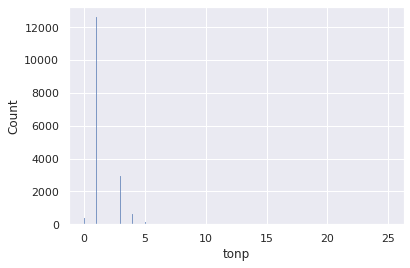

In [ ]:
#tonp: number of total floors. It includes floors that existed before
sns.histplot(x='tonp', data=df_construction_2012)

In [ ]:
df_construction_2012['tonp'].describe()

count    29050.000000
mean         1.742857
std          1.032588
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         25.000000
Name: tonp, dtype: float64

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
df_construction_2012['valte1'].describe()

count        29,050.00
mean         13,355.40
std       1,408,848.01
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     240,000,215.00
Name: valte1, dtype: float64

In [ ]:
df_construction_2012['valte2'].describe()

count    29,050.00
mean        241.30
std       8,279.86
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     860,000.00
Name: valte2, dtype: float64

In [ ]:
df_construction_2012['valte3'].describe()

count   29,050.00
mean         1.46
std        199.57
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     32,512.00
Name: valte3, dtype: float64

In [ ]:
df_construction_2012['valt'].describe()

count        29,050.00
mean         13,598.16
std       1,408,894.85
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     240,000,215.00
Name: valt, dtype: float64

In [ ]:
df_construction_2012['vted'].describe()

count       29,050.00
mean        72,343.47
std        394,677.20
min             74.00
25%         15,442.50
50%         30,000.00
75%         57,260.00
max     36,700,000.00
Name: vted, dtype: float64

In [ ]:
df_construction_2012['CARCO'].describe()

count    29,050.00
mean        411.63
std       5,177.90
min           0.00
25%          88.00
50%         153.00
75%         261.00
max     598,671.00
Name: CARCO, dtype: float64

In [ ]:
df_construction_2012['CARDPAR'].describe()

count   29,050.00
mean         1.16
std         26.05
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      1,365.00
Name: CARDPAR, dtype: float64

In [ ]:
df_construction_2012[['CSUTE', 'sute']].describe()

,CSUTE,sute
count,"29,050.00","29,050.00"
mean,647.59,509.18
std,"5,689.16","2,958.77"
min,0.00,0.00
25%,109.00,108.00
50%,202.00,200.00
75%,381.00,369.00
max,"598,671.00","220,000.00"


In [ ]:
df_construction_2012['DESCDISPUSO'].unique()

array(['Tres o Más Familias', 'Comercial', 'Otras', 'Recreación Deporte',
       'Una Familia', 'Mixto Residencial y No Residencial',
       'Dos Familias', 'Educación', 'Transporte y Comunicaciones',
       'Industrial', 'Edificio Administrativo',
       'Iglesias - Templos - Afines',
       'Hospitales Clínicas Estab de Salud', 'Cultura'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='DESCDISPUSO'>

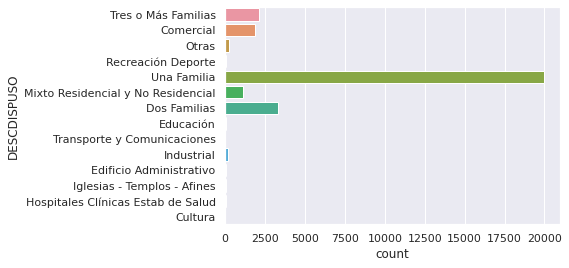

In [ ]:
sns.countplot(y='DESCDISPUSO', data=df_construction_2012)

In [ ]:
df_construction_2012['DESCDISPRFX'].unique()

array(['Recursos Propios de Empresas y Constructoras Privadas',
       'Recursos Propios Personales',
       'Recursos Propios gobierno central, provincial, seccional',
       'Préstamos de Otras Financieras', 'Préstamos de Otros Bancos',
       'Préstamos del IESS, ISFA o ISPOL', 'Recursos Propios Otros',
       'Otros Préstamos', 'Préstamos de las Mutualistas',
       'Préstamos del Banco de la Vivienda-MIDUVI',
       'Recursos Propios de las Mutualistas'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='DESCDISPRFX'>

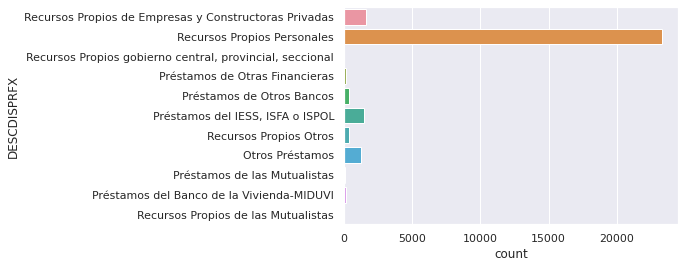

In [ ]:
sns.countplot(y='DESCDISPRFX', data=df_construction_2012)

In [ ]:
df_construction_2012['DESCDISPRFI'].unique()

array(['Recursos Propios de Empresas y Constructoras Privadas',
       'Recursos Propios Personales',
       'Recursos Propios gobierno central, provincial, seccional',
       'Préstamos de Otras Financieras', 'Otros Préstamos',
       'Préstamos de Otros Bancos', 'Préstamos del IESS, ISFA o ISPOL',
       'Recursos Propios Otros', 'Préstamos de las Mutualistas',
       'Préstamos del Banco de la Vivienda-MIDUVI',
       'Recursos Propios de las Mutualistas'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='DESCDISPRFI'>

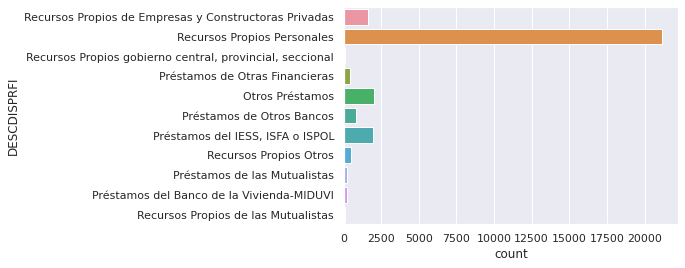

In [ ]:
sns.countplot(y='DESCDISPRFI', data=df_construction_2012)

In [ ]:
df_construction_2012[(df_construction_2012['DESCDISPRFX'] != df_construction_2012['DESCDISPRFI'])]

,provin,desprovin,canton,descodcantf,mes,desmes,año,desaño,nubo,fper,...,CDISPARC,DESCDISPARC,CDISPRFI,DESCDISPRFI,CDISPRFX,DESCDISPRFX,CNUVICAL,CVAE,CAREAUR,DESCAREAUR
6,18,TUNGURAHUA,1,AMBATO,10,OCTUBRE,3,2012,12,2012-10-23,...,6,( >=500 M2),11,Otros Préstamos,1,Recursos Propios Personales,0,120000,2,Rural
14,18,TUNGURAHUA,3,CEVALLOS,7,JULIO,3,2012,1,2012-07-12,...,2,( >=100 M2 Y <200 M2),9,Préstamos de Otros Bancos,1,Recursos Propios Personales,0,15000,1,Urbana
31,5,COTOPAXI,1,LATACUNGA,10,OCTUBRE,3,2012,40,2012-10-04,...,2,( >=100 M2 Y <200 M2),9,Préstamos de Otros Bancos,1,Recursos Propios Personales,1,43879,1,Urbana
49,1,AZUAY,1,CUENCA,9,SEPTIEMBRE,3,2012,106,2012-09-30,...,4,( >=300 M2 Y <400 M2),2,Recursos Propios de Empresas y Constructoras P...,1,Recursos Propios Personales,2,45000,1,Urbana
77,19,ZAMORA CHINCHIPE,6,EL PANGUI,10,OCTUBRE,3,2012,3,2012-10-24,...,1,( < 100 M2 ),3,Recursos Propios Otros,1,Recursos Propios Personales,1,6200,1,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,7,EL ORO,4,BALSAS,9,SEPTIEMBRE,3,2012,2,2012-09-03,...,1,( < 100 M2 ),11,Otros Préstamos,1,Recursos Propios Personales,1,6000,1,Urbana
28840,13,MANABÍ,9,MONTECRISTI,7,JULIO,3,2012,13,2012-07-27,...,1,( < 100 M2 ),11,Otros Préstamos,1,Recursos Propios Personales,1,5400,1,Urbana
28843,1,AZUAY,1,CUENCA,10,OCTUBRE,3,2012,103,2012-10-31,...,6,( >=500 M2),9,Préstamos de Otros Bancos,2,Recursos Propios de Empresas y Constructoras P...,12,1720800,1,Urbana
28877,7,EL ORO,12,SANTA ROSA,11,NOVIEMBRE,3,2012,12,2012-11-21,...,1,( < 100 M2 ),11,Otros Préstamos,1,Recursos Propios Personales,1,5400,1,Urbana


In [ ]:
df_construction_2012['CNUVICAL'].describe()

count   29,050.00
mean         3.66
std        128.90
min          0.00
25%          1.00
50%          1.00
75%          1.00
max     15,561.00
Name: CNUVICAL, dtype: float64

In [ ]:
df_construction_2012['CVAE'].describe()

count       29,050.00
mean       106,550.18
std      1,224,565.94
min             74.00
25%         15,715.75
50%         30,275.50
75%         59,676.50
max     98,325,000.00
Name: CVAE, dtype: float64

In [ ]:
df_construction_2012.shape

(29050, 96)

In [ ]:
df_construction_2012['DESCAREAUR'].unique()

array(['Urbana', 'Rural'], dtype=object)

In [ ]:
df_construction_2012['DESCTIPOBR']

0        Nueva Construcción
1                Ampliación
2        Nueva Construcción
3        Nueva Construcción
4        Nueva Construcción
                ...        
29045    Nueva Construcción
29046    Nueva Construcción
29047    Nueva Construcción
29048    Nueva Construcción
29049    Nueva Construcción
Name: DESCTIPOBR, Length: 29050, dtype: object

In [ ]:
df_construction_2012.drop(
    columns=[
        'provin', 
        'canton', 
        'propie', 
        'tipbr', 
        'cimi', 
        'estru', 
        'pared', 
        'cubi', 
        'cres', 
        'coa11', 
        'nup11', 
        'are11', 
        'coa22', 
        'nup22', 
        'are22', 
        'coa33', 
        'nup33', 
        'are33', 
        'codte1', 
        'valte1', 
        'codte2', 
        'valte2', 
        'codte3', 
        'valte3', 
        'codur1', 
        'valur1', 
        'codur2', 
        'valur2', 
        'codur3', 
        'valur3', 
        'cove', 
        'vaede', 
        'cov2', 
        'vae22', 
        'cov3', 
        'vae33', 
        'COAMS', 
        'COVEMS', 
        'COVET5', 
        'CDISPRFI', 
        'CAREAUR'   
        ], inplace=True
    )

In [ ]:
#I create a new csv file with cleaned data
df_construction_2012.to_csv('/work/data/df_cleaned.csv', index=False)

Now that data is cleaned and understood we can go to analysis.ipynb, where the analysis will be performed. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7486714e-3dca-42f0-bbb4-3b27fc0abd8f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>